# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

#### Importar a Base de dados

In [9]:
!pip install pandas
!pip install openpyxl
!pip installnumpy


[notice] A new release of pip available: 22.2.1 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.1 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: unknown command "installnumpy" - maybe you meant "install"



In [10]:
import pandas as pd

tabela = pd.read_csv("advertising.csv")

display(tabela)
print(tabela.info())

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

              TV     Radio    Jornal    Vendas
TV      1.000000  0.054809  0.056648  0.901208
Radio   0.054809  1.000000  0.354104  0.349631
Jornal  0.056648  0.354104  1.000000  0.157960
Vendas  0.901208  0.349631  0.157960  1.000000


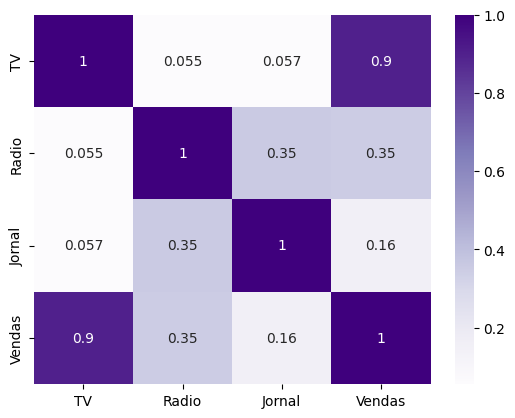

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

print (tabela.corr())

#cria o grafico (sns) - heatmap é mapa de calor, cmap é a cor e annot é anotações
sns.heatmap(tabela.corr(), cmap="Purples", annot=True)

#exibe o grafico (plt)
plt.show()





#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [ ]:
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [48]:

#treino 70% e teste 30%

# Y é quem voce quer prever - no caso vendas
y = tabela["Vendas"]

# X é oq vc usa p prever  - no caso a base 
x = tabela[["TV", "Radio", "Jornal"]]


from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y)






#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [49]:
#importar a inteligencia artificial
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#criar a inteligencia artificial
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

#treinar a inteligencia artificial
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [51]:

previsaoRL = modelo_regressaolinear.predict(x_teste)
previsaoAD = modelo_arvoredecisao.predict(x_teste)

from sklearn.metrics import r2_score   
#r2_score compara a previsao com o teste

print(r2_score(y_teste, previsaoRL))
print(r2_score(y_teste, previsaoAD))

0.9193775914390053
0.9751458649944891


#### Visualização Gráfica das Previsões

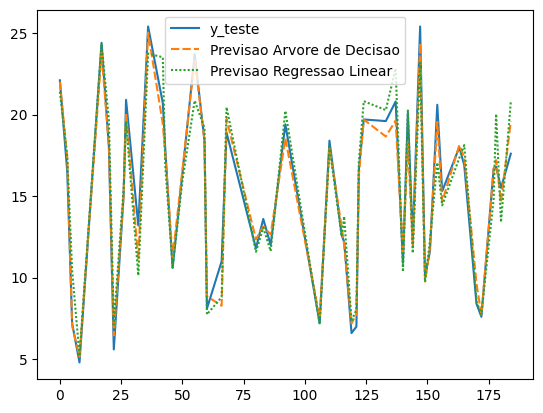

,y_teste,Previsao Arvore de Decisao,Previsao Regressao Linear
8,4.8,5.159,5.192144
36,25.4,25.025,23.741831
60,8.1,8.862,7.743692
22,5.6,6.462,7.117351
5,7.2,7.036,10.436376
3,16.5,17.396,17.402343
137,20.8,19.629,22.821136
149,10.1,9.759,9.741174
68,18.9,19.729,20.449830
147,25.4,24.381,23.171549


In [57]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar ["y_teste"] = y_teste
tabela_auxiliar["Previsao Arvore de Decisao"] = previsaoAD
tabela_auxiliar["Previsao Regressao Linear"] = previsaoRL

sns.lineplot(data=tabela_auxiliar)
plt.show()

display(tabela_auxiliar)



#### Como fazer uma nova previsão?

In [58]:
tabela2 = pd.read_csv("novos.csv")

display(tabela2)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


In [59]:
previsao = modelo_arvoredecisao.predict (tabela2)
print(previsao)

[ 7.438  9.113 19.824]
